# **Introduction**

The COVID-19 pandemic has significantly impacted society, and the need for accurate and reliable information has never been greater. In this project, we propose to use natural language processing (NLP) techniques to classify text data related to COVID-19 tweets.
Specifically, we will use the dataset from this [Kaggle](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification) link.

This notebook focuses on collecting data, organizing it, data wrangling, exploratory data analysis (EDA), and ensuring it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, if necessary.

This dataset from Kaggle provides a collection of tweets associated with the COVID-19 epidemic event that have been labeled with key topics. It is an excellent resource for those wishing to perform natural language processing (NLP) tasks such as sentiment analysis, text classification, and more. The data includes the tweet text, user handles, and associated topic labels, making it ideal to analyze and understand the conversation around the pandemic from March 2020 to April 2020.

# **Data Wrangling and Exploratory Data Analysis (EDA)**


---



## Load Data

In [1]:
from google.colab import files
upload=files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv
Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [2]:
# To ignore stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# To support plotly plots
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00


## Import Libraries

In [4]:
# For Data
import pandas as pd
import numpy as np
import os

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud
import re

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import defaultdict, Counter


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# For Styling
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

In [5]:
data_corona_NLP_test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin-1')
data_corona_NLP_train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin-1')

In [6]:
original_train_data = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin-1')

In [7]:
# To check stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Exploring the Data

In [8]:
data_corona_NLP_test.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [9]:
data_corona_NLP_train.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [10]:
print('Shape of test =', data_corona_NLP_test.shape, '\nShape of train =',data_corona_NLP_train.shape)

Shape of test = (3798, 6) 
Shape of train = (41157, 6)


## Data Type

In [11]:
data_corona_NLP_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [12]:
data_corona_NLP_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [13]:
data_corona_NLP_test.describe()

UserName    ScreenName
count  3798.000000   3798.000000
mean   1899.500000  46851.500000
std    1096.532489   1096.532489
min       1.000000  44953.000000
25%     950.250000  45902.250000
50%    1899.500000  46851.500000
75%    2848.750000  47800.750000
max    3798.000000  48750.000000

In [14]:
data_corona_NLP_train.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

## Sentiment Analysis

In [15]:
print(data_corona_NLP_test.Sentiment.value_counts())
print('='*30, '\n', data_corona_NLP_train.Sentiment.value_counts())

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64
 Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


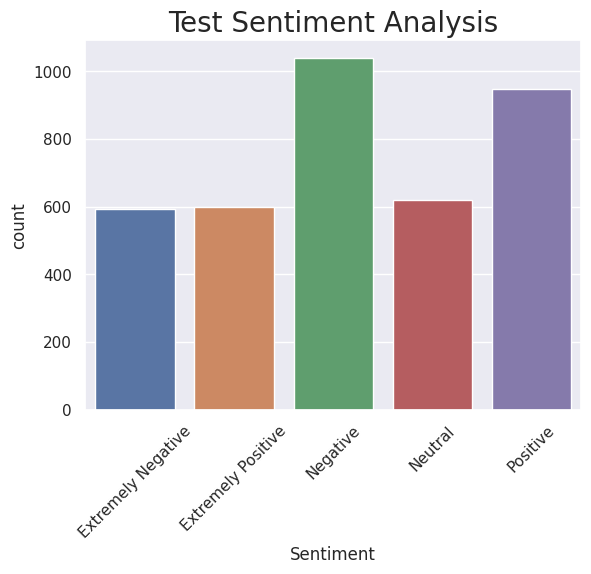

In [16]:
# Sentiment Analysis
sns.set_theme(style="darkgrid")
sns.countplot(x = data_corona_NLP_test['Sentiment'].sort_values())
plt.xticks(rotation=45)
plt.title("Test Sentiment Analysis",fontsize=20)
plt.savefig('Test Sentiment Analysis.png')

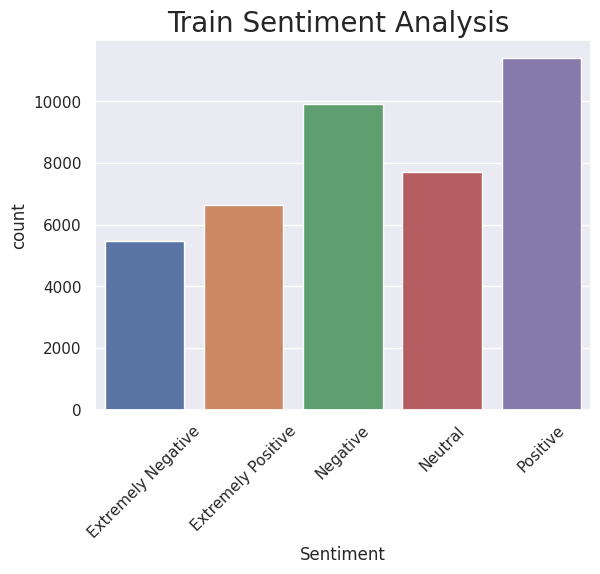

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x = data_corona_NLP_train['Sentiment'].sort_values())
plt.xticks(rotation=45)
plt.title("Train Sentiment Analysis ",fontsize=20)
plt.savefig('Train Sentiment Analysis.png')

## Convert sentiment catagories into 3-main catagories

In [18]:
# Convert 5-sentiment catagories into 3 catagories: Positive, Negative and Neutral
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

In [19]:
# Assign new 3-main catagories to the data
data_corona_NLP_test['Sentiment']=data_corona_NLP_test['Sentiment'].apply(lambda x:change_sen(x))
data_corona_NLP_train['Sentiment']=data_corona_NLP_train['Sentiment'].apply(lambda x:change_sen(x))

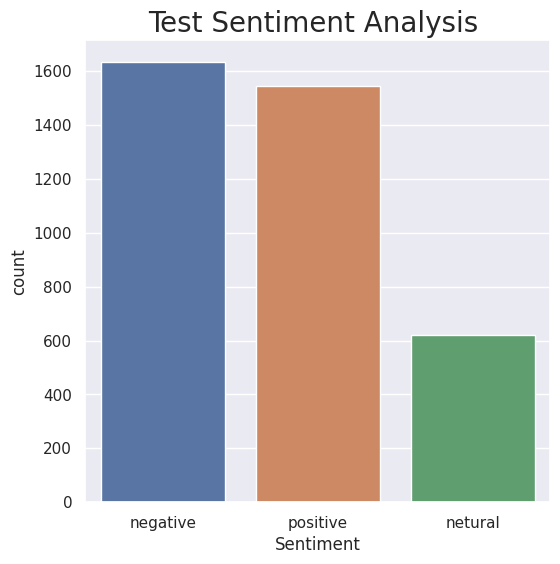

In [20]:
plt.figure(figsize=(6,6))
plt.title("Test Sentiment Analysis ",fontsize=20)
sns.countplot(data_corona_NLP_test['Sentiment']);
plt.savefig('Test Sentiment Analysis-1.png')

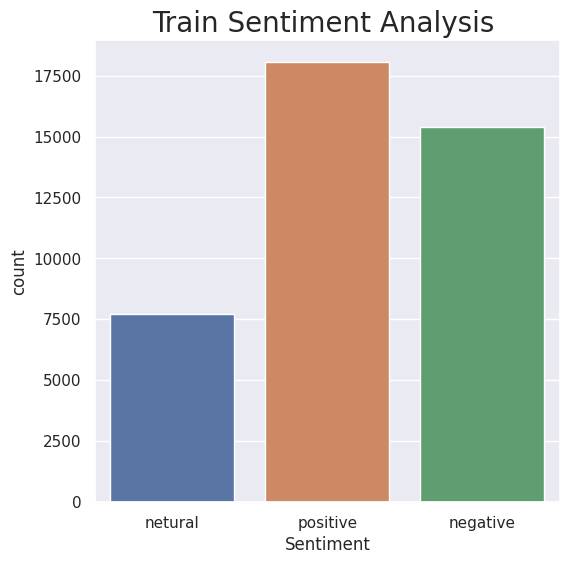

In [21]:
plt.figure(figsize=(6,6))
plt.title("Train Sentiment Analysis ",fontsize=20)
sns.countplot(data_corona_NLP_train['Sentiment']);
plt.savefig('Train Sentiment Analysis-1.png')

Most of the tweets were positive sentiments as people were wishing everyone to stay safe from Covid-19. The negative sentiment was due to a lack of awareness and carelessness by not wearing masks and taking other necessary precautions to stop the spread of this disease. A lot of people were confused and scared as they don't know what to expect in a pandemic.

## Null Values

In [22]:
# Null Values
data_corona_NLP_test.isnull().sum().sort_values(ascending=False)

Location         834
UserName           0
ScreenName         0
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [23]:
data_corona_NLP_train.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

## Missing Values Percentage

In [24]:
# % of Missing Values
test_missing_values = pd.concat([data_corona_NLP_test.isnull().sum(), 100 * data_corona_NLP_test.isnull().mean()], axis=1).sort_values(0, ascending=True)
test_missing_values.columns=['Count', '% of Missing Values']
test_missing_values

Count  % of Missing Values
UserName           0             0.000000
ScreenName         0             0.000000
TweetAt            0             0.000000
OriginalTweet      0             0.000000
Sentiment          0             0.000000
Location         834            21.958926

## Duplicate Rows

In [25]:
# Duplicate rows
data_corona_NLP_train[data_corona_NLP_train.duplicated()]

Empty DataFrame
Columns: [UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment]
Index: []

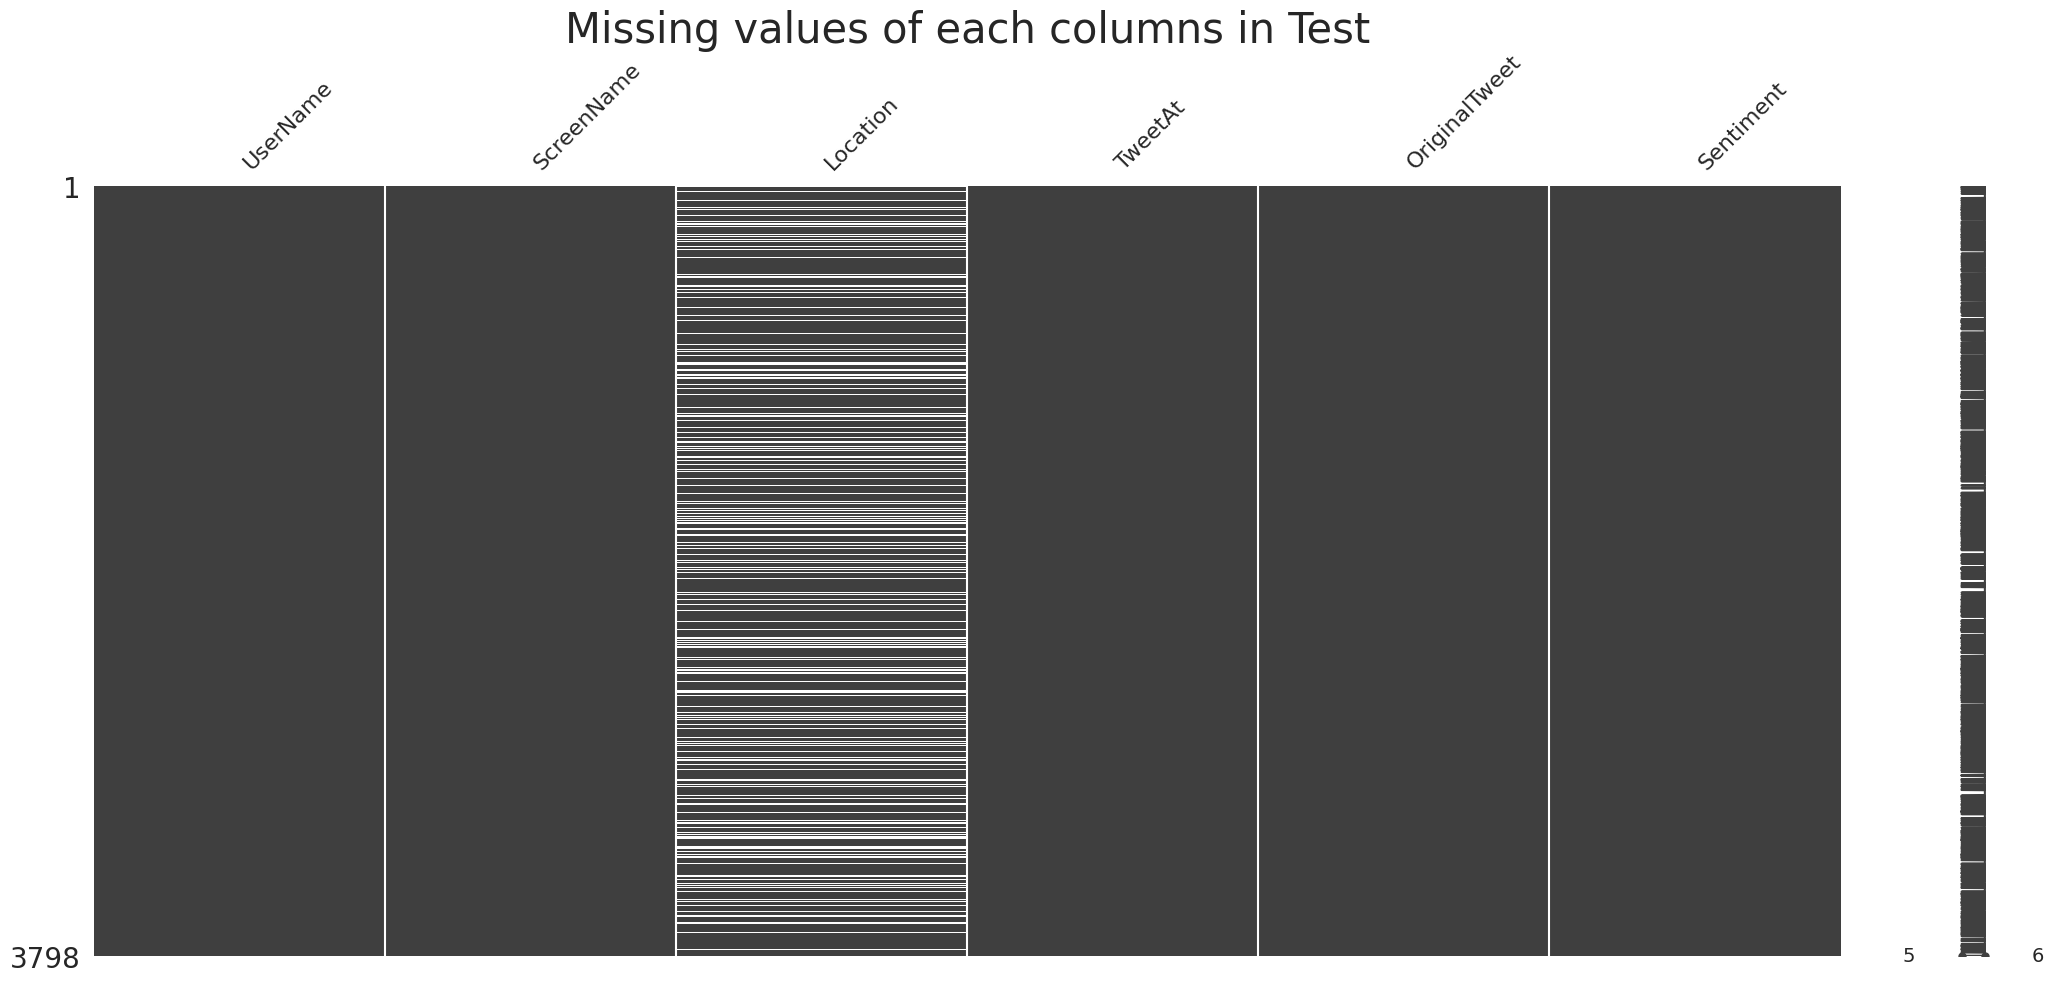

In [26]:
msno.matrix(data_corona_NLP_test)
plt.title('Missing values of each columns in Test', fontsize=30)
plt.savefig('Test Missing Values.png')

In [27]:
train_missing_values = pd.concat([data_corona_NLP_train.isnull().sum(), 100 * data_corona_NLP_train.isnull().mean()], axis=1).sort_values(0, ascending=True)
train_missing_values.columns=['Count', '% of Missing Values']
train_missing_values

Count  % of Missing Values
UserName           0             0.000000
ScreenName         0             0.000000
TweetAt            0             0.000000
OriginalTweet      0             0.000000
Sentiment          0             0.000000
Location        8590            20.871298

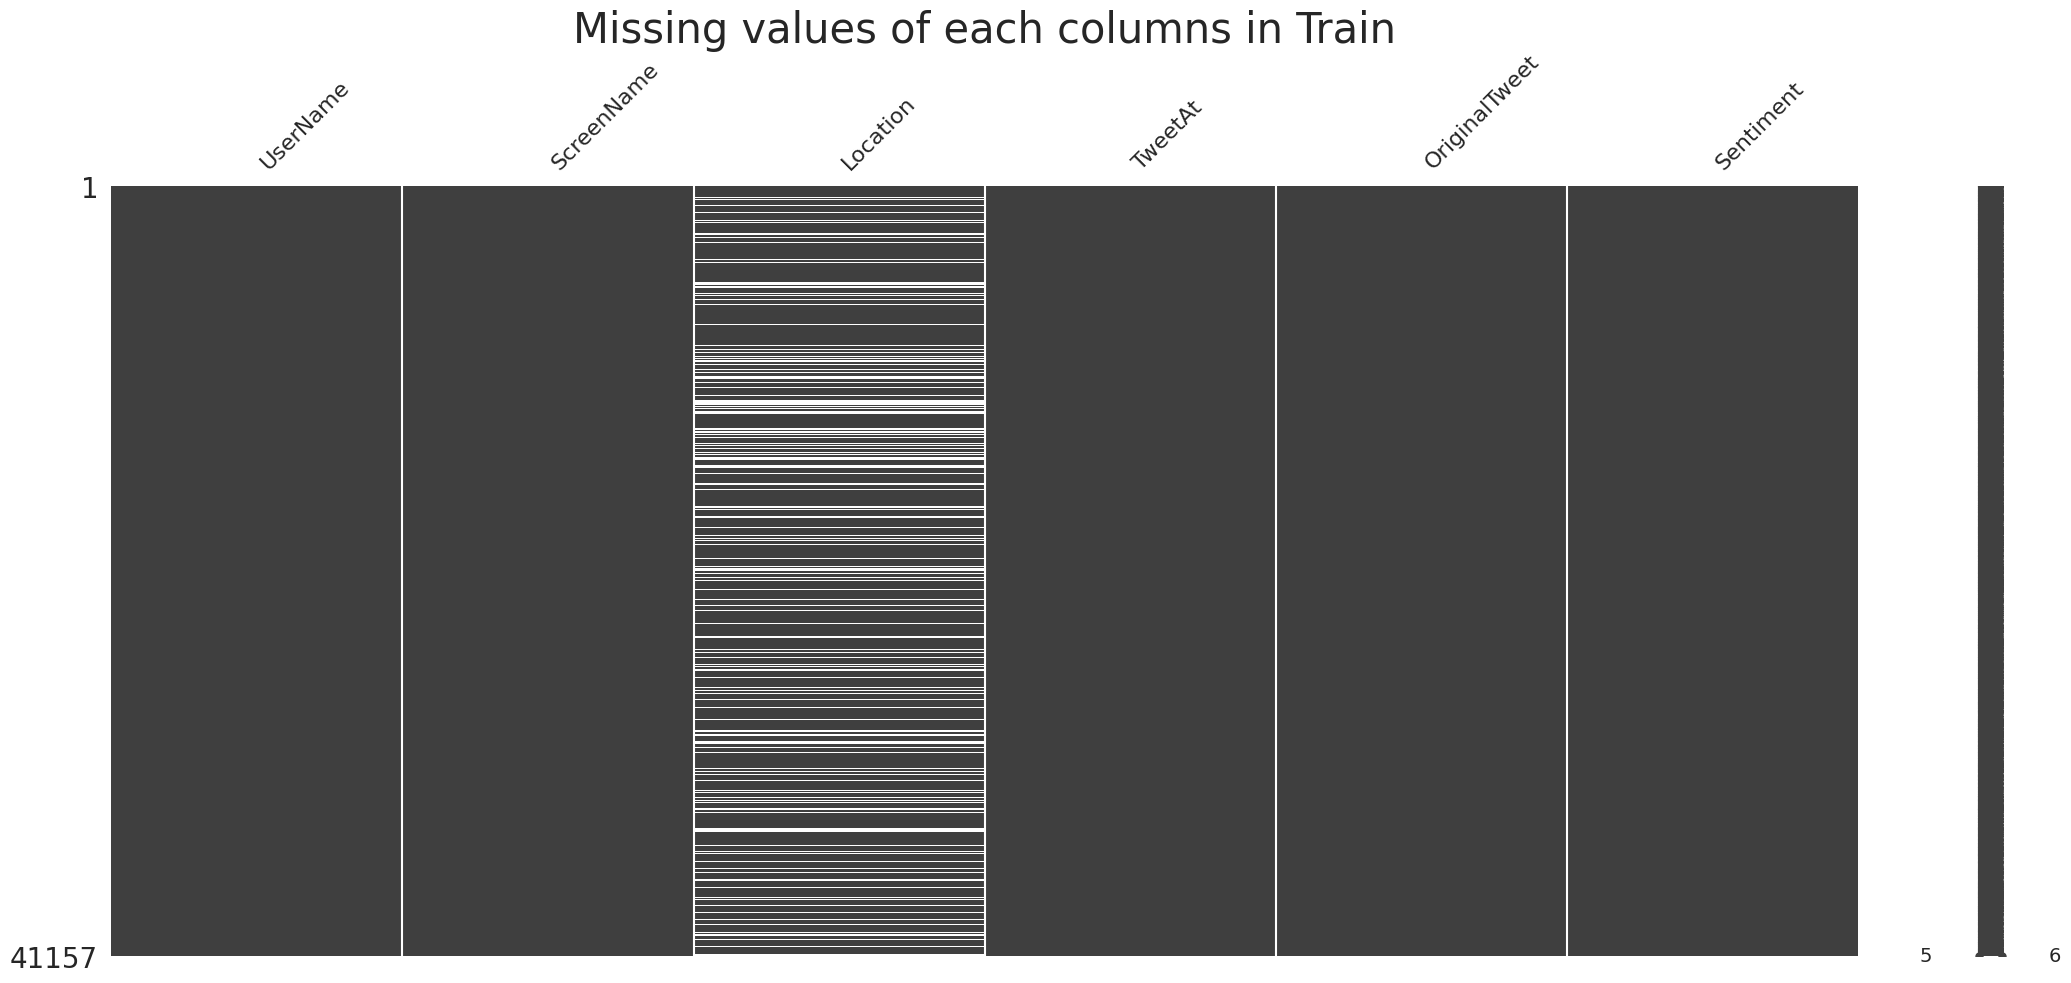

In [28]:
msno.matrix(data_corona_NLP_train)
plt.title('Missing values of each columns in Train', fontsize=30)
plt.savefig('Train Missing Values.png')

Data is very clean and only the Location column has some missing and null values.

In [ ]:
#num_tweet = []

# calculate number of tweets on each day
#for date in data_corona_NLP_test.TweetAt:
#    num_tweet.append(date)

## Tweets Timeline

In [29]:
# Tweets Timeline
time = data_corona_NLP_train.groupby(['TweetAt']).size()

In [30]:
time.sort_values(ascending=True)
#time.sort_index(ascending=False)
#time

TweetAt
28-03-2020      23
30-03-2020      87
29-03-2020     125
14-04-2020     284
31-03-2020     316
27-03-2020     345
01-04-2020     630
16-03-2020     656
04-04-2020     767
12-04-2020     803
03-04-2020     810
11-04-2020     909
02-04-2020     954
10-04-2020    1005
05-04-2020    1131
26-03-2020    1277
13-04-2020    1428
09-04-2020    1471
24-03-2020    1480
06-04-2020    1742
07-04-2020    1843
08-04-2020    1881
17-03-2020    1977
23-03-2020    2062
22-03-2020    2114
21-03-2020    2653
18-03-2020    2742
25-03-2020    2979
19-03-2020    3215
20-03-2020    3448
dtype: int64

In [31]:
time.index

Index(['01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020', '05-04-2020',
       '06-04-2020', '07-04-2020', '08-04-2020', '09-04-2020', '10-04-2020',
       '11-04-2020', '12-04-2020', '13-04-2020', '14-04-2020', '16-03-2020',
       '17-03-2020', '18-03-2020', '19-03-2020', '20-03-2020', '21-03-2020',
       '22-03-2020', '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020'],
      dtype='object', name='TweetAt')

In [ ]:
'''
from datetime import datetime

# input list of date strings
inputDateList = time.index
# sorting the input list by formatting each date using the strptime() function
inputDateList.sort(key=lambda date: datetime.strptime(date, "%m-%d-%Y"))
'''

In [32]:
a1 = data_corona_NLP_train['TweetAt']
a1.index

RangeIndex(start=0, stop=41157, step=1)

In [33]:
fig = px.line(data_corona_NLP_train, 
              #x = data_corona_NLP_train.TweetAt,
              x=time.index, 
              #x = time.sort_values(ascending=True),
              #x = data_corona_NLP_train['TweetAt'].sort_values,
              #x = a1.index,
              y=time.values, 
              title = 'Tweets Timeline',
              template='simple_white')

fig.update_layout(font=dict(size=17,family="Times New Roman"), xaxis_title="Date", yaxis_title="Number of Tweets")
fig.show()

Timeline shows that most of the tweets originated in the late March 2020, which was the peak season for Covid-19.

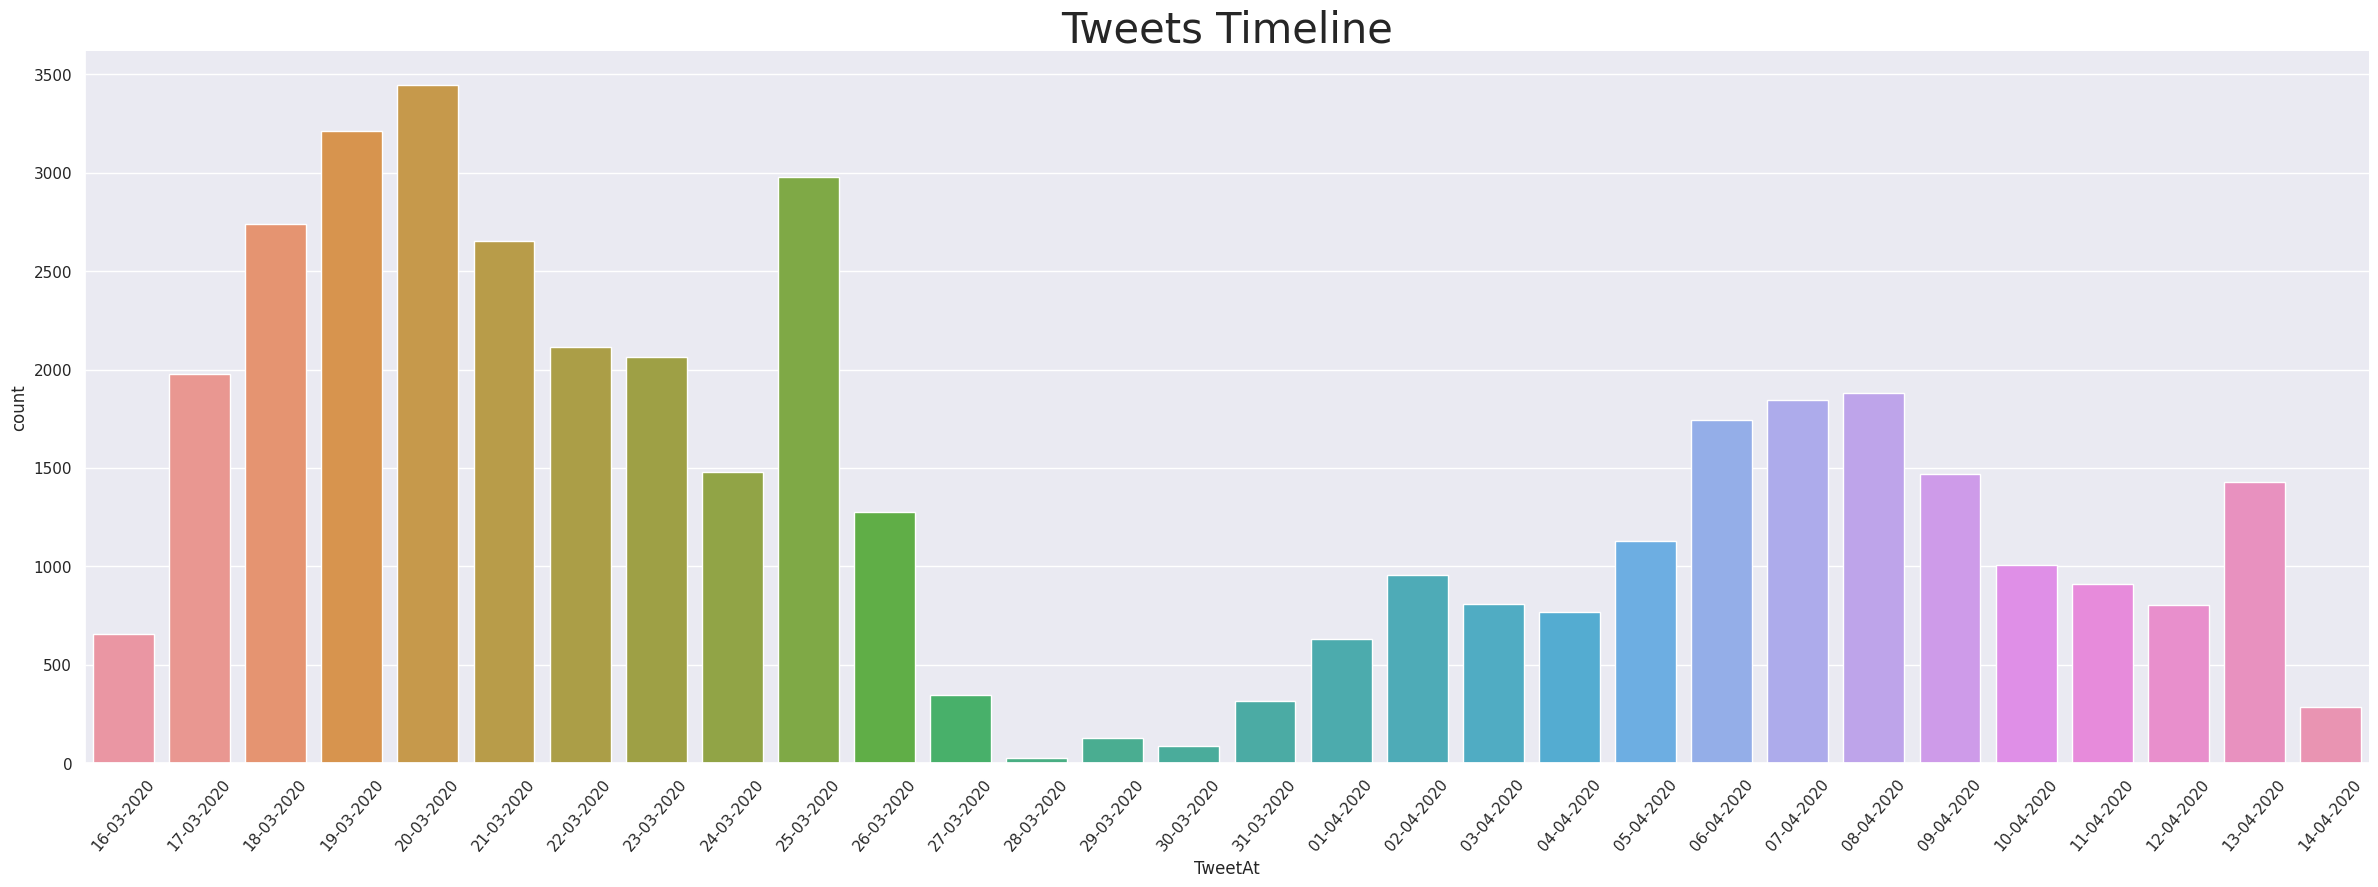

In [43]:
g=sns.catplot("TweetAt", data=original_train_data, kind="count", height=8, aspect=3)
g.set_xticklabels(rotation=50)
plt.title('Tweets Timeline', fontsize=30)
plt.savefig('Tweets Timeline-1.png')

## Top 10 Tweets Location

In [44]:
# Top 10 Tweets Location
location = data_corona_NLP_train['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Top 10 Tweet Locations',
        template = 'simple_white')

fig.update_layout(font=dict(size=20,family="Times New Roman"), xaxis_title="Date", yaxis_title="Number of Tweets")

#fig.update_traces(xaxis_title="Date", yaxis_title="Number of Tweets",textposition='inside',
#                  textfont_size=11)
fig.show()

## Sentiment Analysis Plots

In [45]:
data_corona_NLP_train['text'] = data_corona_NLP_train["OriginalTweet"]
data_corona_NLP_train["text"] = data_corona_NLP_train["text"].astype(str)

target = data_corona_NLP_train.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
target.style.background_gradient(cmap='pink')

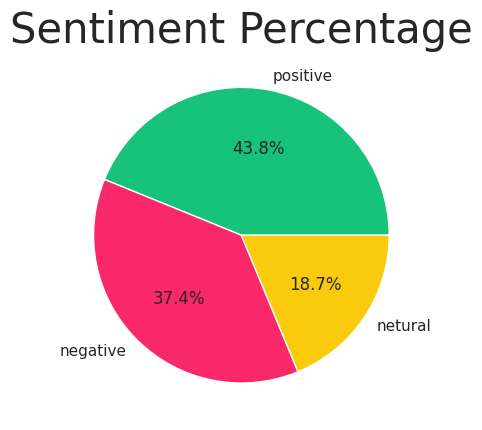

In [46]:
percent_target = target['text']
labels = target['Sentiment']
plt.title('Sentiment Percentage', fontsize=30)
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_target, radius = 1, labels=labels, colors=colors, autopct="%.1f%%")

plt.setp(my_pie, width=1.0, edgecolor='white') 
plt.savefig('Pie Chart of Sentiments.png')
plt.show()

In [48]:
fig = make_subplots(1,2,subplot_titles=('Train','Test'))
x = data_corona_NLP_train['Sentiment'].value_counts()

fig.add_trace(go.Bar(x=x.index, y=x.values, marker_color=['#17C37B','#F92969','#FACA0C'], name='train'), row=1, col=1)

x = data_corona_NLP_test['Sentiment'].value_counts()

#plt.savefig('Train Test Comparision.png')
fig.add_trace(go.Bar(x=x.index, y=x.values, marker_color=['#17C37B','#F92969','#FACA0C'], name='test'), row=1, col=2)

In [49]:
plt.savefig('Train Test Comparision.png')

<Figure size 640x480 with 0 Axes>

## Number of Words in a Tweet

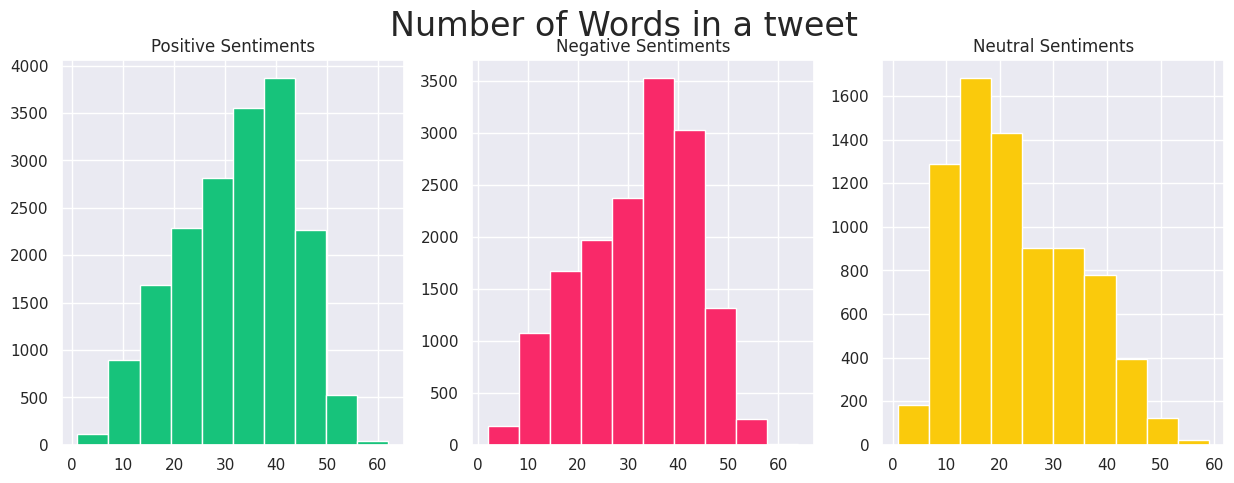

In [51]:
# No of words in a tweet

# 3-subplots
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Positive Sentiments
tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="positive"]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('Positive Sentiments')

# Negative Sentiments
tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

# Neutral Sentiments
tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="netural"]['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')
plt.savefig('No of Words in a Tweet.png')
fig.suptitle('Number of Words in a tweet', fontsize = 24)
plt.show()

## Number of Characters in a Tweet

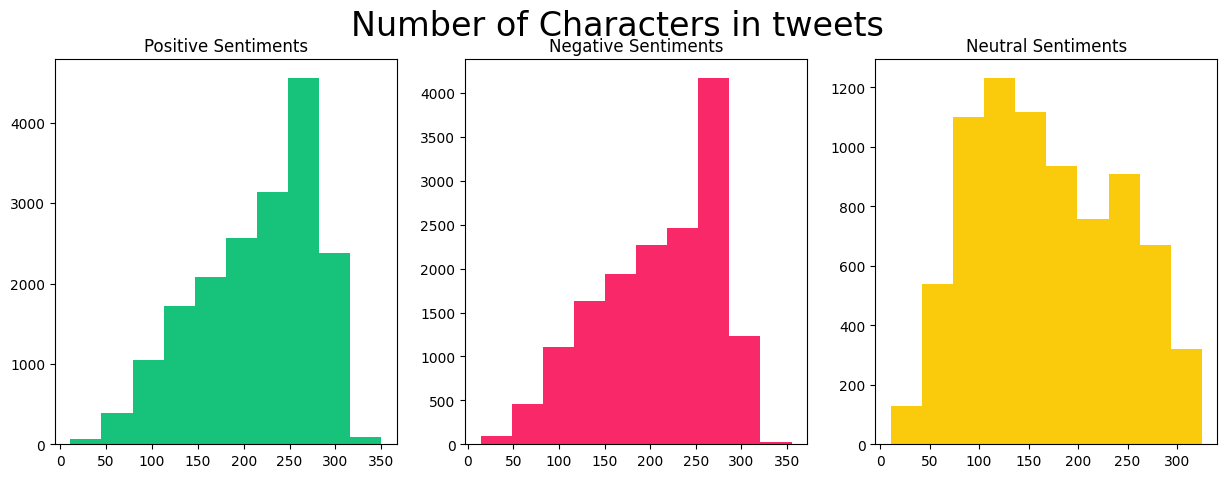

In [ ]:
# No of characters in a tweet

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="positive"]['text'].str.len()
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="negative"]['text'].str.len()
ax2.hist(tweet_len, color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="netural"]['text'].str.len()
ax3.hist(tweet_len, color='#FACA0C')
ax3.set_title('Neutral Sentiments')
plt.savefig('No of Characters in a Tweet.png')
fig.suptitle('Number of Characters in tweets', fontsize = 24)
plt.show()

## Stop Words - Dropping common words with little value

In [52]:
# load stop words
stop_word = stopwords.words('english')

In [55]:
stop_word
#stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Drop unnecessary words, symbols, tags

In [65]:
# Remove unnecessary words, symbols, tags
def corpus(target):
    
    # remove urls
    target = re.sub(r'http\S+', " ", target)

    # remove mentions
    target = re.sub(r'@\w+',' ', target)

    # remove hastags
    target = re.sub(r'#\w+', ' ', target)

    # remove digits
    target = re.sub(r'\d+', ' ', target)

    # remove html tags
    target = re.sub('r<.*?>',' ', target)

    # remove amp
    target = re.sub(r'amp',' ', target)

     # remove Â
    target = re.sub(r'Â',' ', target)
    
    # remove stop words 
    target = target.split()
    target = " ".join([word for word in target if not word in stop_word])    
      
    return target

In [66]:
# New data afer removing unnecessary tags
data_corona_NLP_train['OriginalTweet'] = data_corona_NLP_train['OriginalTweet'].apply(lambda x: corpus(x))
data_corona_NLP_test['OriginalTweet'] = data_corona_NLP_test['OriginalTweet'].apply(lambda x: corpus(x))

## Normalize and Transform labels between 0 and 1

In [67]:
# train['Sentiment'] = train['Sentiment'].map({'positive':2, 'negative':0, 'neutral':1})

from sklearn.preprocessing import LabelEncoder

# Normalize and transform labels between 0 and 1
le = LabelEncoder()
  
# Encode labels in column 'Sentiment'.
data_corona_NLP_train['Sentiment'] = le.fit_transform(data_corona_NLP_train['Sentiment'])
  
data_corona_NLP_train['Sentiment'].unique()

array([1, 2, 0])

In [68]:
data_corona_NLP_train.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet  Sentiment  \
0                                                             1   
1  advice Talk neighbours family exchange phone n...          2   
2  Coronavirus Australia: Woolworths give elderly...          2   
3  My food stock one empty... PLEASE, panic, THER...          2   
4  Me, ready go supermarket outbreak. Not I'm par...          0   

                                                text  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

In [72]:
# Check the text again to see if anything needed to be removed
data_corona_NLP_train.text.values

array(['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
       'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
       ...,
       'You know itÂ\x92s getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!',
       'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus',
       "@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was a

In [73]:
data_corona_NLP_train.OriginalTweet.values

array(['',
       'advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order',
       'Coronavirus Australia: Woolworths give elderly, disabled dedicated shopping hours amid COVID- outbreak',
       ...,
       'You know \x92s getting tough rationing toilet paper martinsville, help us out!!',
       'Is wrong smell hand sanitizer starting turn on?',
       'Well new/used Rift S going $ . Amazon rn although normal market price usually $ . . Prices really crazy right vr headsets since HL Alex announced worse COVID- . Up whethe'],
      dtype=object)

## Split Sentiment Groups into Numeric number

In [74]:
# Split sentiment groups 
Positive = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 2].OriginalTweet
Neutral  = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 1].OriginalTweet
Negative = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 0].OriginalTweet

## Wordcloud of Tweet Sentiments

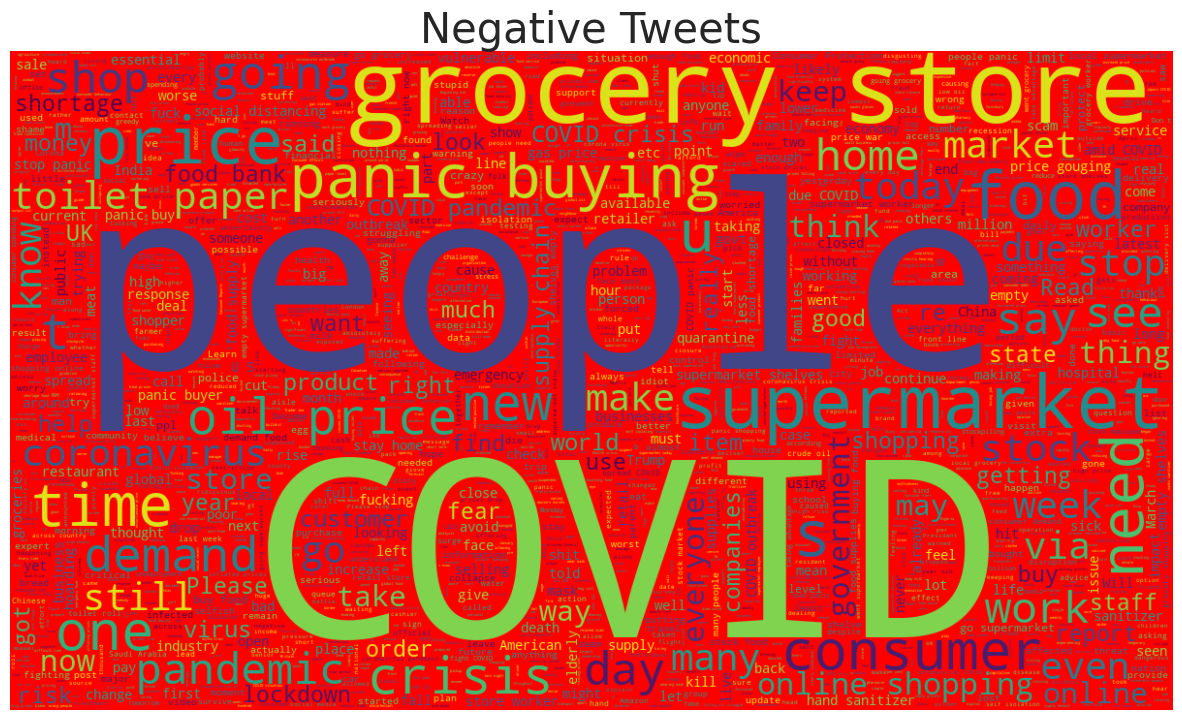

In [75]:
# Wordcloud of Negative Tweets 
plt.figure(figsize = (15,12), facecolor='white')
plt.title('Negative Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='red', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Negative))
#plt.savefig('Negative Tweets Wordcloud.png')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.savefig('Negative Tweets Wordcloud.png')
#plt.tight_layout(pad = 0) 
#plt.grid(None)

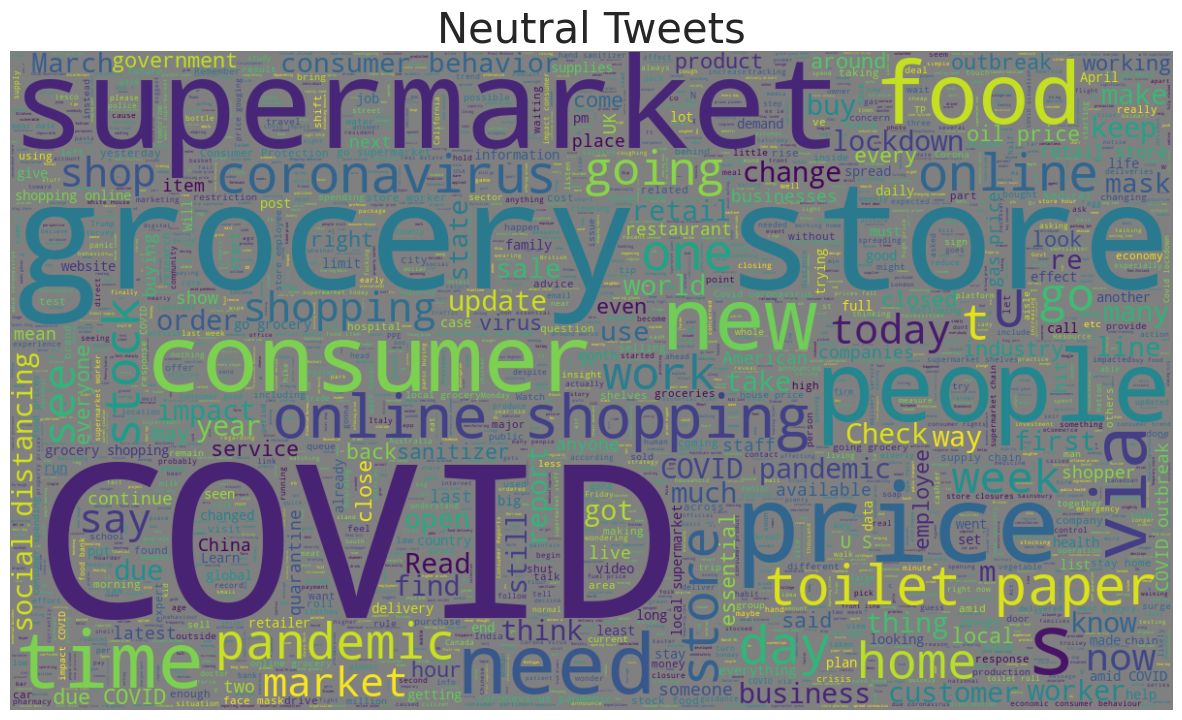

In [76]:
# Wordcould of Neutral Tweets 
plt.figure(figsize = (15,12)) 
plt.title('Neutral Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='grey', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Neutral))
#plt.savefig('Neutral Tweets Wordcloud.png')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.savefig('Neutral Tweets Wordcloud.png')
#plt.grid(None)

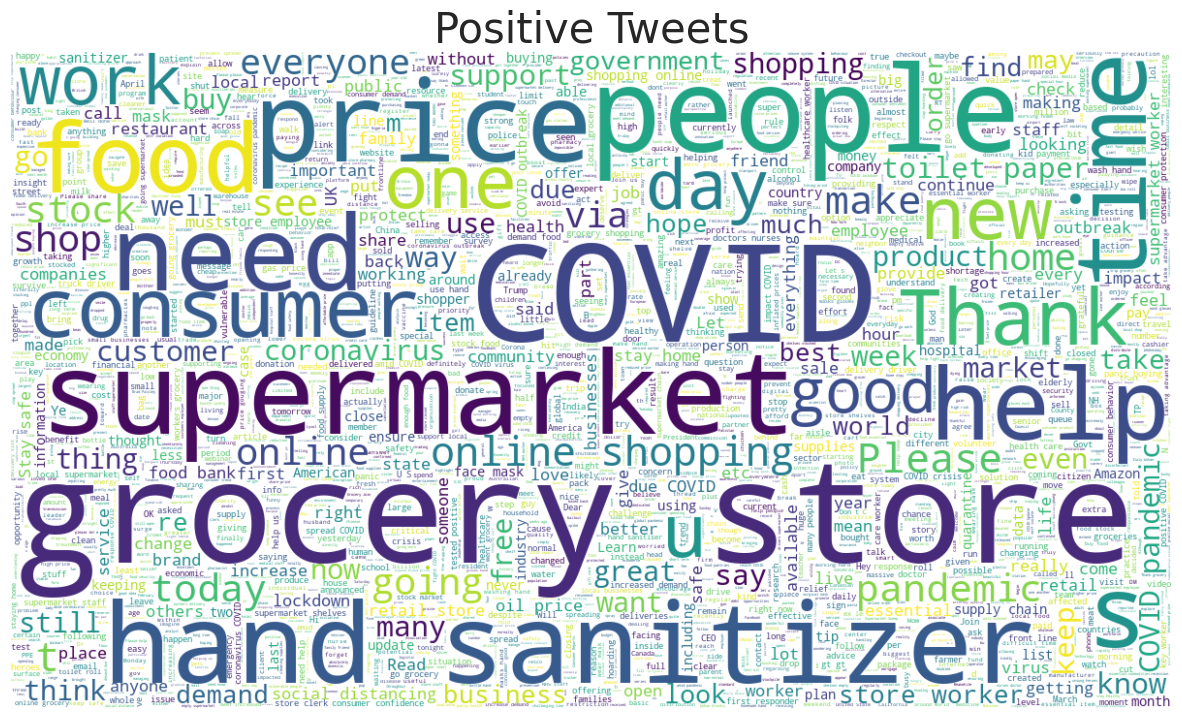

In [77]:
# Wordcould of Positive Tweets 
plt.figure(figsize = (15,12)) 
plt.title('Positive Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='white', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Positive))
#plt.savefig('Positive Tweets Wordcloud.png')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.savefig('Positive Tweets Wordcloud.png')
#plt.grid(None)

## Hashtags in Covid-19 Tweets

In [78]:
# Get all the hashtags

def extract_hash_tags(s):
    hashes = re.findall(r"#(\w+)", s)
    return " ".join(hashes)

original_train_data['hashtags'] = original_train_data['OriginalTweet'].apply(lambda x : extract_hash_tags(x))

In [79]:
allHashTags = list(original_train_data[(data_corona_NLP_train['hashtags'] != None) & (original_train_data['hashtags'] != "")]['hashtags'])
allHashTags = [tag.lower() for tag in allHashTags]

hash_df = dict(Counter(allHashTags))

top_hash_df = pd.DataFrame(list(hash_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:20]
top_hash_df.head()

KeyError: ignored

In [ ]:
# Hashtag Plot
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

fig = px.bar(x=top_hash_df['word'],y=top_hash_df['count'],
       orientation='v',
       color=top_hash_df['word'],
       text=top_hash_df['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Words",
                  yaxis_title="Count",
                  title="Top #hashtags in Covid19 Tweets",
                  font=dict(size=17,family="Times New Roman"))
#fig.write_image('top_hashtags.png')
fig.show()

Plot above show the most common hashtags with coronavirus and covid_19 was the most trending hashtags of the time.


## Concluding Remarks


After performing data wrangling and exploratory data analysis (EDA), the key takeaway is that the data set contains valuable information about the relationship between different variables. In addition, the analysis reveals important insights regarding the distribution of the data, the correlation between location, timeline and sentiments, and any potential relationships between different variables. With this information, we can now begin to make informed decisions about the data and use it to make predictions and build models.